## Importação das bibliotecas

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import math
from sklearn import metrics

## Leitura dos dados

In [3]:
data = pd.read_csv('credit-data.csv')
data.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


## Removendo dados desnecessários

In [4]:
data.drop('clientid', axis = 1, inplace=True)
print(data.isnull().sum())
data = data.dropna()

income     0
age        3
loan       0
default    0
dtype: int64


## Descrição dos dados

In [5]:
data.describe()

,income,age,loan,default
count,1997.000000,1997.000000,1997.000000,1997.000000
mean,45333.864334,40.807559,4445.487716,0.141713
std,14325.131177,13.624469,3046.792457,0.348842
min,20014.489470,-52.423280,1.377630,0.000000
25%,32804.904487,28.990415,1936.813257,0.000000
50%,45788.747100,41.317159,3977.287432,0.000000
75%,57787.565659,52.587040,6440.861434,0.000000
max,69995.685578,63.971796,13766.051239,1.000000


In [6]:
data.corr()

,income,age,loan,default
income,1.000000,-0.033687,0.441539,0.002222
age,-0.033687,1.000000,0.002309,-0.429759
loan,0.441539,0.002309,1.000000,0.377169
default,0.002222,-0.429759,0.377169,1.000000


In [7]:
data.shape

(1997, 4)

## Criação dos datasets de treino e teste

In [8]:
values = data.values
np.random.seed(1)
np.random.shuffle(values)
n = 0.75
x_train = values[:int(1997*n) , :3]
y_train = values[:int(1997*n) , 3]
x_test = values[int(1997*n): , :3]
y_test = values[int(1997*n): , 3]

# Criação dos diferentes kernels do SVC

In [9]:
linear = SVC(kernel = 'linear', C = 1.0)
linear.fit(x_train, y_train)
linearPrev = linear.predict(x_test)

rbf = SVC(kernel = 'rbf', C = 1.0)
rbf.fit(x_train, y_train)
rbfPrev = rbf.predict(x_test)

sigmoid = SVC(kernel = 'sigmoid', C = 1.0)
sigmoid.fit(x_train, y_train)
sigmoidPrev = sigmoid.predict(x_test)

%time

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


# Criação dos gráficos com os resultados

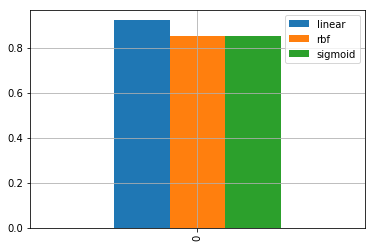

In [12]:
resultados = pd.DataFrame([
    metrics.accuracy_score(linearPrev, y_test), metrics.accuracy_score(rbfPrev, y_test),
    metrics.accuracy_score(sigmoidPrev, y_test)
])

resultados
resultados = resultados.transpose()
resultados.columns = ['linear', 'rbf', 'sigmoid']

resultados.head()

resultados.plot(kind='bar', grid=True);

In [11]:
print(metrics.classification_report(linearPrev, y_test));

             precision    recall  f1-score   support

        0.0       0.97      0.94      0.96       441
        1.0       0.64      0.80      0.71        59

avg / total       0.93      0.92      0.93       500

